In [1]:

import matplotlib.pyplot as plt
#import scipy.stats as sts
import numpy as np
import cmdstanpy ## import stan interface for Python
#from scipy.integrate import solve_ivp
#from matplotlib.gridspec import GridSpec
import os
import seaborn as sns
import pandas as pd
#import math
# from scipy.special import logit,expit
from importlib import reload 
import sys
# import patchworklib as pw
sys.path.append("..")
from statannotations.Annotator import Annotator
from itertools import product
pd.set_option("display.max_colwidth", 10000)

import arviz
import matplotlib as mpl

tex_fonts = {
    # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "Helvetica",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 7,
    "font.size": 7,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 6,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6,
    "axes.grid": True,
    'grid.color': '#DDDDDD',
    'grid.linestyle': '-',
    'grid.linewidth': 0.3,
    "lines.markersize":4,
    "lines.markeredgewidth":1,
    'axes.axisbelow':True,
    'pdf.fonttype':42,
    'axes.linewidth':0.5,
    'xtick.major.width':0.5,
    'ytick.major.width':0.5,
    'ytick.minor.width':0.3,

    'ytick.major.pad':0.2,
    "xtick.major.size":3,
    "ytick.major.size":3,
}

plt.rcParams.update(tex_fonts)




ratio= 2/(1+np.sqrt(5))

width = 520.344
if os.name == "nt": ## adds compiler to path in Windows
    cmdstanpy.utils.cxx_toolchain_path() 
    


time_index_equilibrium = np.linspace(10000/1, 10000, 1)
my_pal = {"4cm": "g", 
          "4em": "m", 
          "Donor":"#a4e0ef", 
          "Host":"#ff7f0e",
#             "donor":"blue", 
#           "host":"#DC582A",
         "WT":"#02feff",
         "Young CHIM":"#7d81fc",
         "Old CHIM":"#f50aff"}

my_marks = {"Donor": "o",#"$\circ$", 
           "Host": "^",
         "WT":"o",
         "Young CHIM":"P",
         "Old CHIM":"^"}

scatterkwags = {
                  'edgecolor':'k',
                      'linewidth':.15, 
    'alpha':0.7,
    'zorder':1



                
}


df_donor_all = pd.read_excel('/home/elise/Code/BRDU/UPDATED master doc.xlsx', sheet_name='donor cell number',index_col='mouse.ID')
df_host_all = pd.read_excel('/home/elise/Code/BRDU/UPDATED master doc.xlsx', sheet_name='host cell number',index_col='mouse.ID')
df_fractiondonor_all = pd.read_excel('/home/elise/Code/BRDU/UPDATED master doc.xlsx', sheet_name='fraction donor',index_col='mouse.ID')

locations = (df_host_all['expt.location']=='UCL')&(df_host_all['time.post.BMT'] > 20)&(df_host_all['TH.DP1'] > 1E6)&(df_host_all['LN.4nai'] < 1E7)&(df_host_all['LN.4cm'] > 2E4)&(df_donor_all['LN.4cm'] > 1E3)&((df_donor_all['time.post.BMT'] < 120)|((df_donor_all['time.post.BMT'] > 120)&(df_fractiondonor_all['LN.4cm'] > 0.5))) 

#only ucl mice, excluding outliers and before donor cells have entered perpheriy (21days)
df_donor=df_donor_all[locations] #&((df_donor_all['time.post.BMT'] < 120)|((df_donor_all['time.post.BMT'] > 120)&(df_fractiondonor_all['LN.4cm'] > 0.5)))
df_donor['age_cat']=np.where(df_donor['expt.ID'].str.contains("TH205"), 'Old', np.where(df_donor['expt.ID'].str.contains("TH259"), 'Young', 'WT'))


df_host = pd.read_excel('/home/elise/Code/BRDU/UPDATED master doc.xlsx', sheet_name='host cell number',index_col='mouse.ID')

#only ucl mice, excluding outliers and before donor cells have entered perpheriy (21days)
df_host=df_host_all[locations] #& ((df_donor_all['time.post.BMT'] < 120)|((df_donor_all['time.post.BMT'] > 120)&(df_fractiondonor_all['LN.4cm'] > 0.5)))
df_host['age_cat']=np.where(df_host['expt.ID'].str.contains("TH205"), 'Old', np.where(df_host['expt.ID'].str.contains("TH259"), 'Young', 'WT'))


def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

def enumerated_product(*args):
    yield from zip(product(*(range(len(x)) for x in args)), product(*args))
    


/home/elise/anaconda3/envs/cmdstan_working_v3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/home/elise/anaconda3/envs/cmdstan_working_v3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/home/elise/anaconda3/envs/cmdstan_working_v3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/tmp/ipykernel_363793/3996532856.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_donor['age_cat']=np.where(d

ValueError: Invalid path specification: /home/elise/Code/stan-cache/chimerism_fit-20230907164918.csv

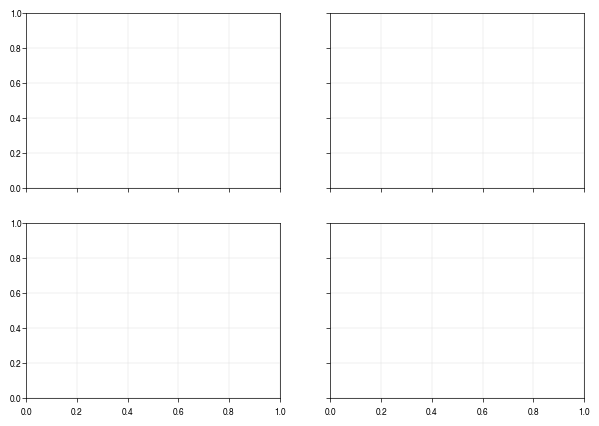

In [2]:
fig, ax = plt.subplots(2,2 , figsize=(7.2, 5), sharex=True,sharey=True)


_categories = df_donor['age_cat'].unique()

n_cat = len(_categories)
cmap = plt.get_cmap('cool', n_cat)
colorMap = {}
k = 0
for i in _categories:
    colorMap[_categories[k]] = k
    k+=1


typei = "branched"

numObs = 100
time_index = np.linspace(1, 300,numObs)


donorhost = pd.read_csv('/home/elise/Code/BRDU/donorhost.csv')

pardf = pd.DataFrame()

populationc = ['4cm','4em']
agec = ['Young','Old']

for idx, adhpop in enumerated_product(populationc, agec):
            
    sam_dhl = cmdstanpy.from_csv(donorhost.loc[(donorhost.Pop==adhpop[0])&(donorhost.Age==adhpop[1])&(donorhost.Type=='linear'),"File"].to_string(index=False))
    sam_dhb = cmdstanpy.from_csv(donorhost.loc[(donorhost.Pop==adhpop[0])&(donorhost.Age==adhpop[1])&(donorhost.Type=='branched'),"File"].to_string(index=False))


    y1 =  sam_dhb.stan_variable("chimerism")

    

    #CM
    ax1 = ax[idx[0],idx[1]]

    mB = np.median(y1[:,:], axis=0)
    lB, uB = np.percentile(y1[:,:], axis=0, q=[2.5, 97.5])
    lin1 = ax1.plot(time_index, mB,label='Chimerism Fit', c='g')
    ax1.fill_between(time_index, lB, uB, alpha=0.4, color='g')
    
    if adhpop[0]=="4cm":
        timeoff = 20
    else:
        timeoff = 25
    
    if adhpop[1]=="Young":
        locationsW =(df_host['age.at.S1K'] < 176)&(df_host['age_cat']=='WT')
        locationsY =(df_host['age.at.S1K'] < 176)&(df_host['age_cat']=='Young')
        points1 = ax1.scatter(df_host[locationsW]['time.post.BMT']-timeoff, 
                              df_donor[locationsW]['LN.'+adhpop[0]]/(df_host[locationsW]['LN.'+adhpop[0]]+df_donor[locationsW]['LN.'+adhpop[0]]), 
                              c='k',  label = 'WT', **scatterkwags)
        points2 = ax1.scatter(df_host[locationsY]['time.post.BMT']-timeoff, 
                              df_donor[locationsY]['LN.'+adhpop[0]]/(df_host[locationsY]['LN.'+adhpop[0]]+df_donor[locationsY]['LN.'+adhpop[0]]), 
                              c="#7d81fc", label = 'Young', **scatterkwags)
    else:
        locationsW =(df_host['age.at.S1K'] > 176)&(df_host['age_cat']=='WT')
        locationsY =(df_host['age.at.S1K'] > 176)&(df_host['age_cat']=='Old')
        points3 = ax1.scatter(df_host[locationsW]['time.post.BMT']-timeoff, 
                              df_donor[locationsW]['LN.'+adhpop[0]]/(df_host[locationsW]['LN.'+adhpop[0]]+df_donor[locationsW]['LN.'+adhpop[0]]), 
                              c='k',  label = 'WT', **scatterkwags)
        points4 = ax1.scatter(df_host[locationsY]['time.post.BMT']-timeoff, 
                              df_donor[locationsY]['LN.'+adhpop[0]]/(df_host[locationsY]['LN.'+adhpop[0]]+df_donor[locationsY]['LN.'+adhpop[0]]), 
                              c="#f50aff", label = 'Old', **scatterkwags)
    ax1.set_ylabel('')
    ax1.set_xlabel('')
    ax1.set_ylim([0,1])
    ax1.set_xlim([0,250])
    
    ax1.set_title(adhpop[1]+' '+adhpop[0])


legend2 = ax[0,0].legend(handles = [points1,points2], loc='upper left')
legend1 = ax[0,1].legend(handles = [points3,points4], loc='upper left')

fig.supylabel('Donor Chimerism')
fig.supxlabel('Time Since Start of Accumulation in Periphery (days)')


plt.tight_layout()

fig.savefig('/home/elise/Dropbox/elisepaperclone/TCellMemory/Figures/figS3.pdf', 
            dpi='figure', format='pdf',
        bbox_inches='tight', pad_inches=0.1)

 